# Data Analysis
##  Project : We Rate Dogs 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

Read and check the twitter_archive_master table

In [3]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,confidence,breed,isdog?,favorite,retweet
0,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,0.511319,Pembroke,True,29978.0,6725.0
1,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,0.707046,German Shepherd,True,19210.0,2740.0
2,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,0.974781,Komondor,True,19134.0,3228.0
3,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,0.955156,Chihuahua,True,15209.0,2913.0
4,846514051647705089,2017-03-28 00:07:32,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,doggo,0.650003,Golden Retriever,True,44360.0,11451.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 14 columns):
tweet_id              1341 non-null int64
timestamp             1341 non-null object
source                1341 non-null object
text                  1341 non-null object
expanded_urls         1341 non-null object
rating_numerator      1341 non-null int64
rating_denominator    1341 non-null int64
name                  1341 non-null object
stage                 1341 non-null object
confidence            1341 non-null float64
breed                 1341 non-null object
isdog?                1341 non-null bool
favorite              1341 non-null float64
retweet               1341 non-null float64
dtypes: bool(1), float64(3), int64(3), object(7)
memory usage: 137.6+ KB


As state in the project details section At least three (3) insights and one (1) visualization must be produced.
I'll try my best to be as exhaustive as possible

### DATA to be analysed and Questions to be answered

In the wrangle act we have the opportunity to gather, assess, clean and merge several data source, over 1341 tweet are now represented and many questions remain unanswered.
First of all I would like to analyse the data in the simplest possible way :
- tweet with the most favorite
- tweet with the most retweet
- spread of the ratings
- favorite breeds

before establishing further correlations...

- does the rating influence the favorite or retweet
- does the favorite and retweet are correlated
- Does some breed are more successfull than other


### Distribution of the stage

Most of the dataset is populated with 'None' stage, in order not to be too result-oriented, we will not take this value into account.

Text(0.5,1,'Distribution of Dog Stage')

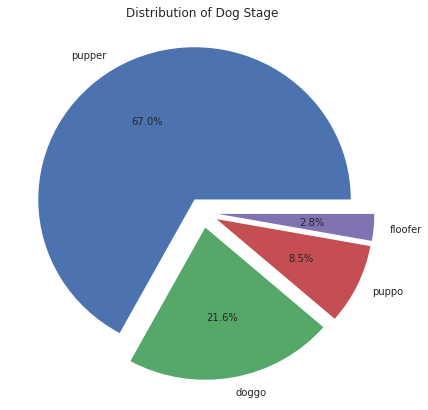

In [8]:
no_none = df.query("stage != 'None'")
stage = no_none['stage'].value_counts()
explode = (0.1, 0.1, 0.1, 0.1)
labels = stage.index.tolist()

plt.figure(figsize = (7, 7))
plt.pie(stage, labels = labels, autopct='%1.1f%%', explode = explode)
plt.title('Distribution of Dog Stage')

This pie chart show us the stage distribution of the dataset with over 67% of pupper tweet

### Average stage rating

Text(0.5,1,'Average Rating of Dog Stage')

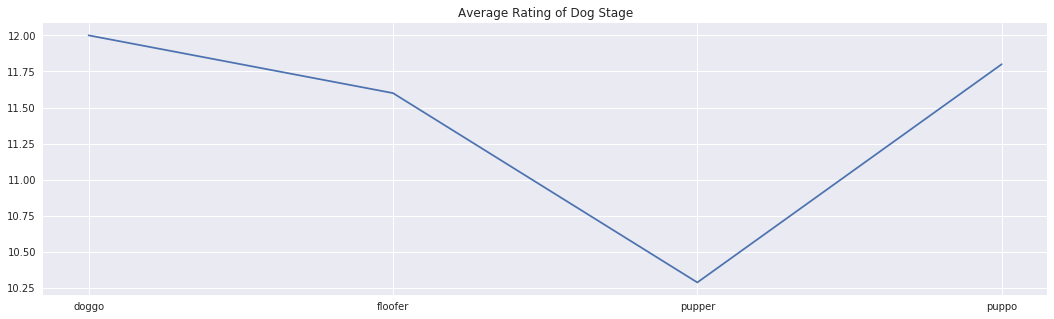

In [9]:
rating_stage = no_none.groupby('stage')['rating_numerator'].mean()
x_stage = rating_stage.index.tolist()


plt.figure(figsize = (18, 5))
plt.plot(x_stage, rating_stage)
plt.title('Average Rating of Dog Stage')

The delta in the rating is only of 1.75, which is surprising because the dataset is populated for 67% of pupper and only 22% of doggo.
At first sight I would admit a bigger difference in ratings

### Distribution of the Top 10 Breed

Text(0.5,1,'Top 10 Most Represented Dog Breed')

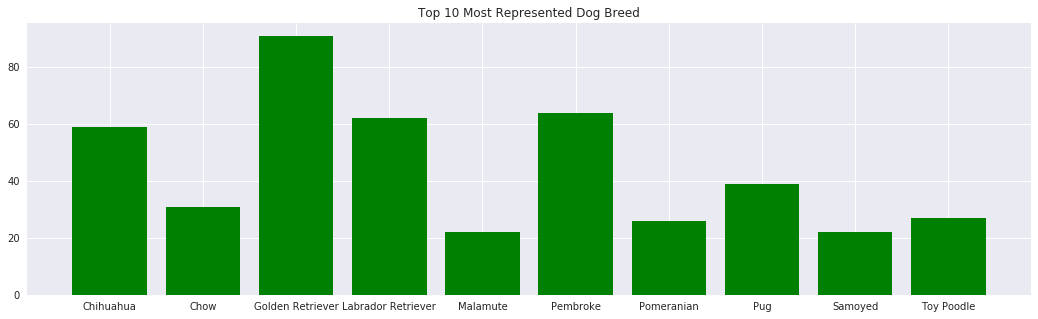

In [10]:
plt.figure(figsize = (18, 5))
top10 = df['breed'].value_counts().head(10)
x_top = top10.index.tolist()
plt.bar(x_top, top10, color='green')
plt.title('Top 10 Most Represented Dog Breed')

### Average Breed Rating

In this plot we see the 10 most breed represented in our dataset, The golden retriever(>90) is the most represented.

Text(0.5,1,'Average Ratings of the Top 10 Most Represented Dog Breed')

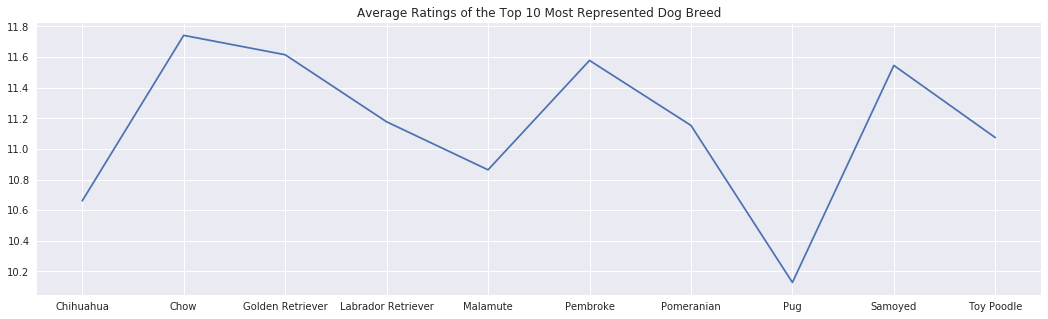

In [11]:
rating_breed = df[df['breed'].isin(x_top)]
rating_breed = rating_breed.groupby('breed')['rating_numerator'].mean()
x_breed = rating_breed.index.tolist()

plt.figure(figsize = (18, 5))
plt.plot(x_breed, rating_breed)
plt.title('Average Ratings of the Top 10 Most Represented Dog Breed')

As seen with the stage average rating,The delta of the breed average rating is approximately 1.7.

### Most Favorited Tweet

In [35]:
fav_sort5 = df.sort_values(by = 'favorite', ascending = False).head(5)
fav_sort5

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,confidence,breed,isdog?,favorite,retweet
442,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,0.505370,Chihuahua,True,121191.0,57007.0
49,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,0.905334,French Bulldog,True,116842.0,33093.0
216,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,None,0.383404,English Springer,True,99631.0,40752.0
19,819004803107983360,2017-01-11 02:15:36,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,0.351308,Standard Poodle,True,88435.0,37591.0
236,870374049280663552,2017-06-01 20:18:38,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13,10,Zoey,None,0.841001,Golden Retriever,True,78802.0,24626.0


### Most Retweeted Tweet

In [36]:
rt_sort5 = df.sort_values(by = 'retweet', ascending = False).head(5)
rt_sort5

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,confidence,breed,isdog?,favorite,retweet
442,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,0.505370,Chihuahua,True,121191.0,57007.0
216,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,None,0.383404,English Springer,True,99631.0,40752.0
19,819004803107983360,2017-01-11 02:15:36,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,0.351308,Standard Poodle,True,88435.0,37591.0
49,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,0.905334,French Bulldog,True,116842.0,33093.0
1081,676219687039057920,2015-12-14 01:58:31,Twitter for iPhone,This is Kenneth. He's stuck in a bubble. 10/10...,https://twitter.com/dog_rates/status/676219687...,10,10,Kenneth,None,0.997556,Bubble,False,75233.0,30526.0


Visually we see that except for zoey the golden retriever , the top 5 is almost the same both of this variable seems at first sight correlated let's check this out :

### Correlation between Favorite, Retweet & Rating

First i'll remove the extra numerator (1776) ratings that skews the result to the left and doesn't allow us to appreciate ratings numerator.

In [13]:
df['rating_numerator'].value_counts()

12      324
11      303
10      273
13      172
9       100
8        70
7        32
14       17
6        17
5        14
3        10
4         5
2         3
1776      1
Name: rating_numerator, dtype: int64

In [14]:
df_plt = df.query("rating_numerator != 1776")

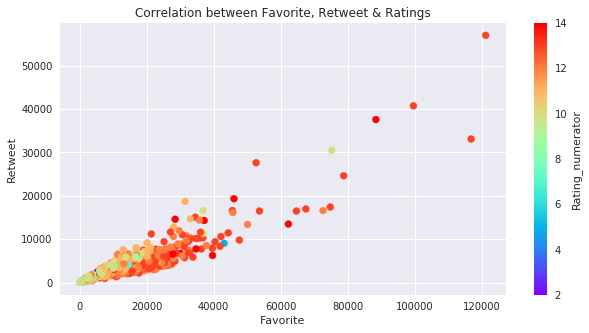

In [17]:
plt.figure(figsize = (10, 5))
cmap = plt.cm.get_cmap('rainbow')

colours = df_plt['rating_numerator']

plt.scatter(df_plt['favorite'], df_plt['retweet'], 
            c = colours, cmap = cmap)
plt.xlabel('Favorite')
plt.ylabel('Retweet')

cbar = plt.colorbar()
cbar.set_label('Rating_numerator')
plt.title('Correlation between Favorite, Retweet & Ratings')
plt.show()

This plot show us the positive correlation between retweet and correlation.

So the more likely a person who likes a tweet the more likely they are to retweet it.

We roughly see that's the more a tweet have rt and fav the more is rating is good (red)

On the 1341 tweet more than the half of them oscillates between 0 & 40000 favorites.

Finnaly on this plot we clearly see that retweet have a higher value for the user, their distribution is only half as important as the favorites.